In [1]:
# reload packages
%load_ext autoreload
%autoreload 2

### Choose GPU (this may not be needed on your computer)

In [2]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=''

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=''


### load packages

In [3]:
from tfumap.umap import tfUMAP

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
import umap
import pandas as pd

### Load dataset

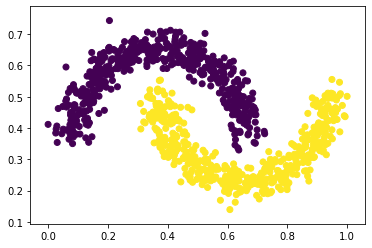

In [15]:
from sklearn.datasets import make_moons

X_train, Y_train = make_moons(1000, random_state=0, noise=0.1)

X_test, Y_test = make_moons(1000, random_state=1, noise=0.1)

X_valid, Y_valid = make_moons(1000, random_state=2, noise=0.1)

def norm(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

X_train = norm(X_train)
X_valid = norm(X_valid)
X_test = norm(X_test)
X_train_flat = X_train

X_test_flat = X_test


plt.scatter(X_test[:,0], X_test[:,1], c=Y_test)

### Create model and train

### define networks

In [16]:
dims = (2)
n_components = 2

In [17]:
from tfumap.vae import VAE, Sampling

In [18]:
encoder_inputs = tf.keras.Input(shape=dims)
x = tf.keras.layers.Flatten()(encoder_inputs)
x = tf.keras.layers.Dense(units=100, activation="relu")(x)
x = tf.keras.layers.Dense(units=100, activation="relu")(x)
x = tf.keras.layers.Dense(units=100, activation="relu")(x)
z_mean = tf.keras.layers.Dense(n_components, name="z_mean")(x)
z_log_var = tf.keras.layers.Dense(n_components, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = tf.keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 2)            0           input_3[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 100)          300         flatten_1[0][0]                  
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 100)          10100       dense_7[0][0]                    
____________________________________________________________________________________________

In [19]:
latent_inputs = tf.keras.Input(shape=(n_components,))
x = tf.keras.layers.Dense(units=100, activation="relu")(latent_inputs)
x = tf.keras.layers.Dense(units=100, activation="relu")(x)
x = tf.keras.layers.Dense(units=100, activation="relu")(x)
decoder_outputs = tf.keras.layers.Dense(units=2, activation="sigmoid")(x)

decoder = tf.keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()


Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               300       
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_12 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 202       
Total params: 20,702
Trainable params: 20,702
Non-trainable params: 0
_________________________________________________________________


### Create model and train

In [20]:
X_train.shape

(1000, 2)

In [21]:
vae = VAE(encoder, decoder)
vae.compile(optimizer=tf.keras.optimizers.Adam())

In [25]:
vae.fit(X_train, epochs=500, batch_size=128)

Epoch 1/500
8/8 [==============================] - 0s 3ms/step - loss: 463.1936 - reconstruction_loss: 459.8925 - kl_loss: 3.3012
Epoch 2/500
8/8 [==============================] - 0s 3ms/step - loss: 463.6160 - reconstruction_loss: 460.3813 - kl_loss: 3.2347
Epoch 3/500
8/8 [==============================] - 0s 3ms/step - loss: 464.4168 - reconstruction_loss: 461.1894 - kl_loss: 3.2274
Epoch 4/500
8/8 [==============================] - 0s 2ms/step - loss: 463.8926 - reconstruction_loss: 460.6926 - kl_loss: 3.2000
Epoch 5/500
8/8 [==============================] - 0s 2ms/step - loss: 462.9273 - reconstruction_loss: 459.7479 - kl_loss: 3.1794
Epoch 6/500
8/8 [==============================] - 0s 3ms/step - loss: 463.4334 - reconstruction_loss: 460.2505 - kl_loss: 3.1829
Epoch 7/500
8/8 [==============================] - 0s 3ms/step - loss: 463.1268 - reconstruction_loss: 459.9898 - kl_loss: 3.1370
Epoch 8/500
8/8 [==============================] - 0s 2ms/step - loss: 463.8119 - reconstr

8/8 [==============================] - 0s 3ms/step - loss: 464.7539 - reconstruction_loss: 462.0234 - kl_loss: 2.7305
Epoch 64/500
8/8 [==============================] - 0s 2ms/step - loss: 464.0328 - reconstruction_loss: 461.2952 - kl_loss: 2.7376
Epoch 65/500
8/8 [==============================] - 0s 3ms/step - loss: 464.2874 - reconstruction_loss: 461.5381 - kl_loss: 2.7493
Epoch 66/500
8/8 [==============================] - 0s 2ms/step - loss: 463.0866 - reconstruction_loss: 460.3352 - kl_loss: 2.7513
Epoch 67/500
8/8 [==============================] - 0s 3ms/step - loss: 463.3231 - reconstruction_loss: 460.5885 - kl_loss: 2.7346
Epoch 68/500
8/8 [==============================] - 0s 3ms/step - loss: 464.5602 - reconstruction_loss: 461.8421 - kl_loss: 2.7181
Epoch 69/500
8/8 [==============================] - 0s 3ms/step - loss: 463.4336 - reconstruction_loss: 460.7133 - kl_loss: 2.7204
Epoch 70/500
8/8 [==============================] - 0s 2ms/step - loss: 461.8280 - reconstructio

8/8 [==============================] - 0s 2ms/step - loss: 462.3273 - reconstruction_loss: 459.7607 - kl_loss: 2.5666
Epoch 126/500
8/8 [==============================] - 0s 3ms/step - loss: 464.3416 - reconstruction_loss: 461.7908 - kl_loss: 2.5508
Epoch 127/500
8/8 [==============================] - 0s 2ms/step - loss: 462.8557 - reconstruction_loss: 460.2785 - kl_loss: 2.5773
Epoch 128/500
8/8 [==============================] - 0s 2ms/step - loss: 462.4758 - reconstruction_loss: 459.9141 - kl_loss: 2.5617
Epoch 129/500
8/8 [==============================] - 0s 2ms/step - loss: 463.0638 - reconstruction_loss: 460.5352 - kl_loss: 2.5286
Epoch 130/500
8/8 [==============================] - 0s 2ms/step - loss: 462.4084 - reconstruction_loss: 459.9053 - kl_loss: 2.5030
Epoch 131/500
8/8 [==============================] - 0s 2ms/step - loss: 462.3484 - reconstruction_loss: 459.8418 - kl_loss: 2.5066
Epoch 132/500
8/8 [==============================] - 0s 2ms/step - loss: 462.5364 - recons

8/8 [==============================] - 0s 2ms/step - loss: 462.9323 - reconstruction_loss: 460.5034 - kl_loss: 2.4289
Epoch 188/500
8/8 [==============================] - 0s 2ms/step - loss: 462.4802 - reconstruction_loss: 460.0301 - kl_loss: 2.4501
Epoch 189/500
8/8 [==============================] - 0s 3ms/step - loss: 463.2988 - reconstruction_loss: 460.8474 - kl_loss: 2.4514
Epoch 190/500
8/8 [==============================] - 0s 3ms/step - loss: 462.7102 - reconstruction_loss: 460.2701 - kl_loss: 2.4402
Epoch 191/500
8/8 [==============================] - 0s 2ms/step - loss: 462.7066 - reconstruction_loss: 460.2872 - kl_loss: 2.4195
Epoch 192/500
8/8 [==============================] - 0s 2ms/step - loss: 461.7486 - reconstruction_loss: 459.3163 - kl_loss: 2.4323
Epoch 193/500
8/8 [==============================] - 0s 2ms/step - loss: 462.9219 - reconstruction_loss: 460.4775 - kl_loss: 2.4444
Epoch 194/500
8/8 [==============================] - 0s 3ms/step - loss: 463.4096 - recons

8/8 [==============================] - 0s 3ms/step - loss: 462.3124 - reconstruction_loss: 459.9262 - kl_loss: 2.3862
Epoch 250/500
8/8 [==============================] - 0s 3ms/step - loss: 462.0950 - reconstruction_loss: 459.7412 - kl_loss: 2.3538
Epoch 251/500
8/8 [==============================] - 0s 2ms/step - loss: 461.9694 - reconstruction_loss: 459.6201 - kl_loss: 2.3493
Epoch 252/500
8/8 [==============================] - 0s 3ms/step - loss: 464.2850 - reconstruction_loss: 461.9072 - kl_loss: 2.3778
Epoch 253/500
8/8 [==============================] - 0s 3ms/step - loss: 462.4379 - reconstruction_loss: 460.0292 - kl_loss: 2.4087
Epoch 254/500
8/8 [==============================] - 0s 3ms/step - loss: 462.0757 - reconstruction_loss: 459.6740 - kl_loss: 2.4017
Epoch 255/500
8/8 [==============================] - 0s 3ms/step - loss: 461.9247 - reconstruction_loss: 459.5222 - kl_loss: 2.4025
Epoch 256/500
8/8 [==============================] - 0s 3ms/step - loss: 462.0753 - recons

8/8 [==============================] - 0s 3ms/step - loss: 462.0766 - reconstruction_loss: 459.7104 - kl_loss: 2.3662
Epoch 312/500
8/8 [==============================] - 0s 3ms/step - loss: 463.3052 - reconstruction_loss: 460.9204 - kl_loss: 2.3848
Epoch 313/500
8/8 [==============================] - 0s 3ms/step - loss: 464.2735 - reconstruction_loss: 461.8967 - kl_loss: 2.3768
Epoch 314/500
8/8 [==============================] - 0s 3ms/step - loss: 462.9342 - reconstruction_loss: 460.5588 - kl_loss: 2.3754
Epoch 315/500
8/8 [==============================] - 0s 3ms/step - loss: 461.2625 - reconstruction_loss: 458.9095 - kl_loss: 2.3529
Epoch 316/500
8/8 [==============================] - 0s 3ms/step - loss: 462.8340 - reconstruction_loss: 460.4806 - kl_loss: 2.3534
Epoch 317/500
8/8 [==============================] - 0s 3ms/step - loss: 462.6490 - reconstruction_loss: 460.2896 - kl_loss: 2.3594
Epoch 318/500
8/8 [==============================] - 0s 3ms/step - loss: 463.5650 - recons

8/8 [==============================] - 0s 3ms/step - loss: 463.5630 - reconstruction_loss: 461.2225 - kl_loss: 2.3406
Epoch 374/500
8/8 [==============================] - 0s 3ms/step - loss: 463.5123 - reconstruction_loss: 461.1831 - kl_loss: 2.3292
Epoch 375/500
8/8 [==============================] - 0s 3ms/step - loss: 463.7984 - reconstruction_loss: 461.4755 - kl_loss: 2.3229
Epoch 376/500
8/8 [==============================] - 0s 3ms/step - loss: 463.7980 - reconstruction_loss: 461.4598 - kl_loss: 2.3382
Epoch 377/500
8/8 [==============================] - 0s 3ms/step - loss: 461.7620 - reconstruction_loss: 459.4034 - kl_loss: 2.3585
Epoch 378/500
8/8 [==============================] - 0s 3ms/step - loss: 462.5196 - reconstruction_loss: 460.1600 - kl_loss: 2.3596
Epoch 379/500
8/8 [==============================] - 0s 3ms/step - loss: 460.1589 - reconstruction_loss: 457.8062 - kl_loss: 2.3527
Epoch 380/500
8/8 [==============================] - 0s 3ms/step - loss: 462.5948 - recons

8/8 [==============================] - 0s 3ms/step - loss: 462.0159 - reconstruction_loss: 459.6775 - kl_loss: 2.3384
Epoch 436/500
8/8 [==============================] - 0s 3ms/step - loss: 462.9612 - reconstruction_loss: 460.6425 - kl_loss: 2.3187
Epoch 437/500
8/8 [==============================] - 0s 3ms/step - loss: 463.2356 - reconstruction_loss: 460.9398 - kl_loss: 2.2958
Epoch 438/500
8/8 [==============================] - 0s 3ms/step - loss: 462.3634 - reconstruction_loss: 460.0462 - kl_loss: 2.3172
Epoch 439/500
8/8 [==============================] - 0s 3ms/step - loss: 462.1840 - reconstruction_loss: 459.8382 - kl_loss: 2.3459
Epoch 440/500
8/8 [==============================] - 0s 3ms/step - loss: 464.1282 - reconstruction_loss: 461.7815 - kl_loss: 2.3467
Epoch 441/500
8/8 [==============================] - 0s 3ms/step - loss: 462.2881 - reconstruction_loss: 459.9607 - kl_loss: 2.3274
Epoch 442/500
8/8 [==============================] - 0s 3ms/step - loss: 462.6591 - recons

8/8 [==============================] - 0s 3ms/step - loss: 461.9403 - reconstruction_loss: 459.6161 - kl_loss: 2.3242
Epoch 498/500
8/8 [==============================] - 0s 3ms/step - loss: 462.6530 - reconstruction_loss: 460.3554 - kl_loss: 2.2975
Epoch 499/500
8/8 [==============================] - 0s 3ms/step - loss: 462.6809 - reconstruction_loss: 460.3952 - kl_loss: 2.2857
Epoch 500/500
8/8 [==============================] - 0s 2ms/step - loss: 463.4657 - reconstruction_loss: 461.1796 - kl_loss: 2.2860


In [26]:
z = vae.encoder.predict(X_train)[0]

### Plot model output

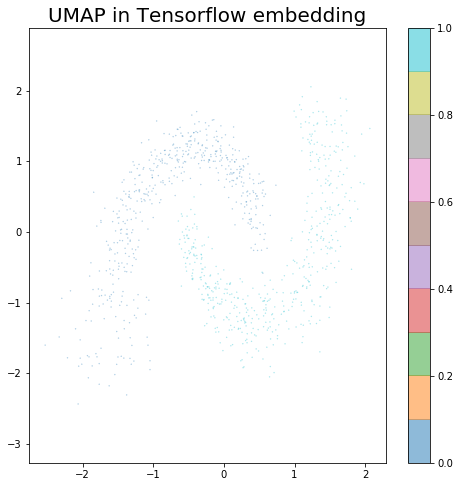

In [27]:
fig, ax = plt.subplots( figsize=(8, 8))
sc = ax.scatter(
    z[:, 0],
    z[:, 1],
    c=Y_train.astype(int)[:len(z)].flatten(),
    cmap="tab10",
    s=0.1,
    alpha=0.5,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("UMAP in Tensorflow embedding", fontsize=20)
plt.colorbar(sc, ax=ax);

In [28]:
z_recon = decoder.predict(z)

(-0.0411129049894488,
 1.0315473727819597,
 0.11797972019759054,
 0.7289531678334151)

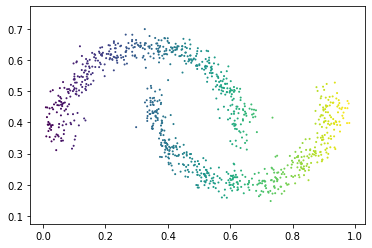

In [32]:
fig, ax = plt.subplots()
ax.scatter(z_recon[:,0], z_recon[:,1], s = 1, c = z_recon[:,0], alpha = 1)
ax.axis('equal')

### Save output

In [33]:
from tfumap.paths import ensure_dir, MODEL_DIR

In [34]:
dataset = 'moons'

In [35]:
output_dir = MODEL_DIR/'projections'/ dataset / 'vae'
ensure_dir(output_dir)

In [36]:
encoder.save(output_dir / 'encoder')

W0822 11:37:27.278963 140345843763008 deprecation.py:323] From /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
W0822 11:37:27.290274 140345843763008 deprecation.py:323] From /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tensorflow/python/training/tracking/tracking.py:111: Layer.updates (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
I0822 11:37:27.626836 140345843763008 builder_impl.py:775] Assets written to: /mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/projections/moons/vae/enc

In [37]:
decoder.save(output_dir / 'encoder')

I0822 11:37:28.028743 140345843763008 builder_impl.py:775] Assets written to: /mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/projections/moons/vae/encoder/assets


In [38]:
#loss_df.to_pickle(output_dir / 'loss_df.pickle')

In [39]:
np.save(output_dir / 'z.npy', z)